In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [2]:
df=pd.read_csv('/home/ahad/Desktop/healthcare-dataset-stroke-data.csv')

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Checking the Dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [14]:
duplicaterows = df[df.duplicated()]
print("Duplicate Rows: ")
duplicaterows

Duplicate Rows: 


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [29]:
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [30]:
df["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [31]:
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [32]:
df["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [33]:
df["heart_disease"].unique()

array([1, 0])

In [34]:
df["hypertension"].unique()

array([0, 1])

In [35]:
df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [341]:
df["stroke"].unique()

array([1, 0])

Feature Engineering

In [41]:
labelencoder = LabelEncoder()

In [43]:
df['Smoking_Status'] = labelencoder.fit_transform(df['smoking_status'])
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Smoking_Status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,2
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,2
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,2
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,2
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,1


In [47]:
df['Residence_Type'] = labelencoder.fit_transform(df['Residence_type'])
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Smoking_Status,Residence_Type
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,2,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,2,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,3,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,2,1
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,2,1
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,2,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,1,0


In [48]:
df['Marital_Status'] = labelencoder.fit_transform(df['ever_married'])
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Smoking_Status,Residence_Type,Marital_Status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,2,0,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,2,0,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,3,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,2,1,1
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,2,1,1
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,2,0,1
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,1,0,1


In [49]:
df['Gender'] = labelencoder.fit_transform(df['gender'])
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Smoking_Status,Residence_Type,Marital_Status,Gender
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,2,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,2,0,1,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,3,1,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,2,1,1,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,2,1,1,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,2,0,1,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,1,0,1,1


In [50]:
df['Work_Type'] = labelencoder.fit_transform(df['work_type'])
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Smoking_Status,Residence_Type,Marital_Status,Gender,Work_Type
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1,1,1,2
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,2,0,1,0,3
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,2,0,1,1,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,3,1,1,0,2
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,2,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,2,1,1,0,2
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,2,1,1,0,3
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,2,0,1,0,3
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,1,0,1,1,2


Gender(0-Female, 1-Male, 2-Other)

Marital_Status(0-No, 1-Yes)

Residence_Type(0-Rural, 1-Urban)

Smoking_Status(0-Unknown, 1-Formerly Smoked, 2-Never Smoked, 3-Smokes)

Work_Type(0-Govtjob, 1-Children, 2-Private, 3-Self Employed)

In [364]:
new_df=df.drop(labels=['id', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'Residence_Type'], axis=1)
new_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Smoking_Status,Marital_Status,Gender,Work_Type
0,67.0,0,1,228.69,36.6,1,1,1,1,2
1,61.0,0,0,202.21,NaN,1,2,1,0,3
2,80.0,0,1,105.92,32.5,1,2,1,1,2
3,49.0,0,0,171.23,34.4,1,3,1,0,2
4,79.0,1,0,174.12,24.0,1,2,1,0,3
...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0,2,1,0,2
5106,81.0,0,0,125.20,40.0,0,2,1,0,3
5107,35.0,0,0,82.99,30.6,0,2,1,0,3
5108,51.0,0,0,166.29,25.6,0,1,1,1,2


<AxesSubplot:xlabel='Gender', ylabel='bmi'>

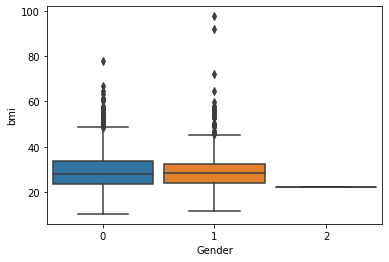

In [365]:
sns.boxplot(x='Gender', y='bmi', data=new_df, width=0.9)

Filling missing values for BMI column based on Gender. Using median value of BMI of each gender to fill up the missing values.

In [366]:
def FillBmiMissingValues(cols):
    bmi = cols[0]
    Gender = cols[1]
    
    if pd.isnull(bmi):
        
        if Gender == 0:
            return new_df[new_df['Gender']==0]['bmi'].median()

        elif Gender == 1:
            return new_df[new_df['Gender']==1]['bmi'].median()
        
        else:
            return new_df[new_df['Gender']==2]['bmi'].median()        

    else:
        return bmi

In [367]:
new_df['bmi'] = new_df[['bmi', 'Gender']].apply(FillBmiMissingValues,axis=1)

In [368]:
new_df.isnull().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
Smoking_Status       0
Marital_Status       0
Gender               0
Work_Type            0
dtype: int64

Data Visualization

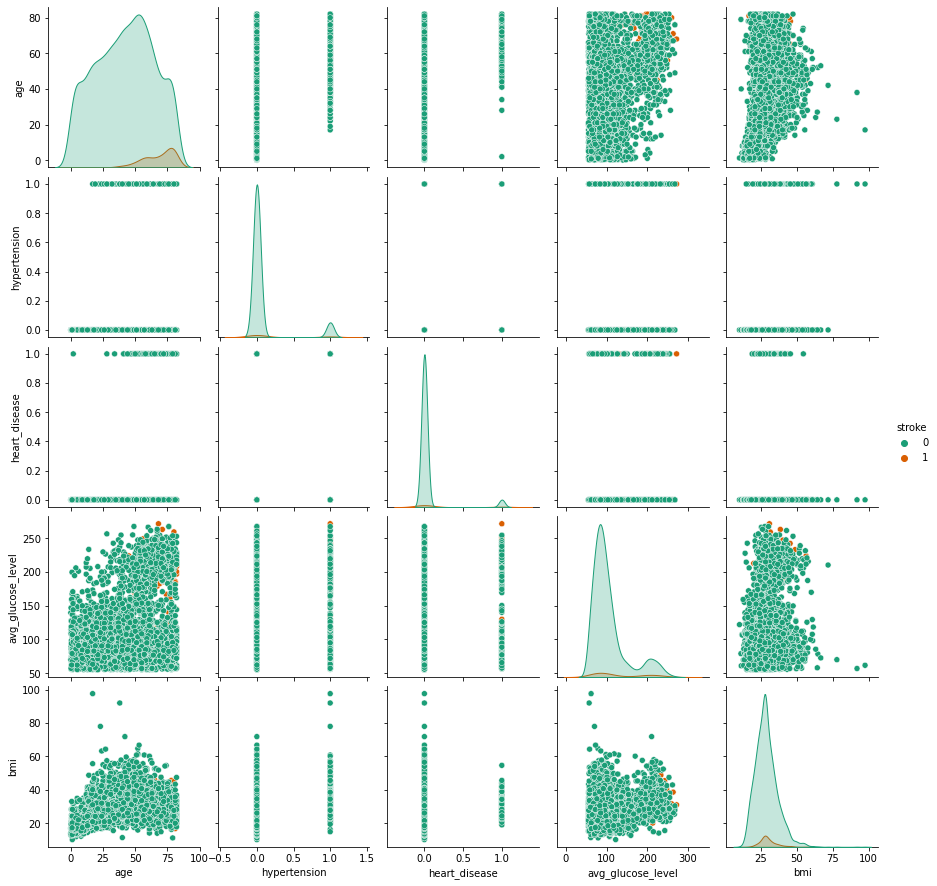

In [369]:
sns.pairplot(new_df, vars=['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], hue='stroke', palette='Dark2')

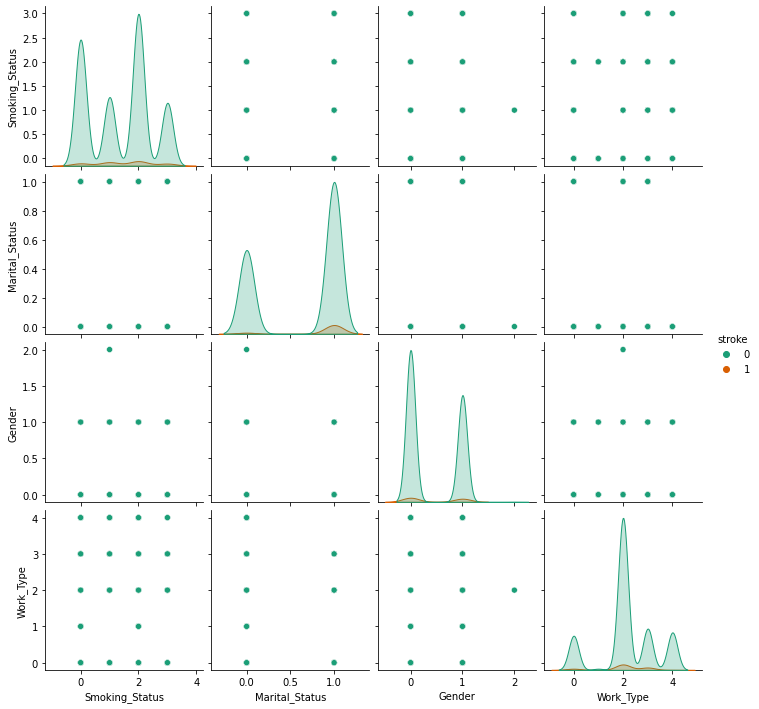

In [370]:
sns.pairplot(new_df, vars=['Smoking_Status', 'Marital_Status', 'Gender', 'Work_Type'], hue='stroke', palette='Dark2')

Splitting the data

In [371]:
newdf_X = new_df.drop('stroke',axis=1)

In [372]:
newdf_X

,age,hypertension,heart_disease,avg_glucose_level,bmi,Smoking_Status,Marital_Status,Gender,Work_Type
0,67.0,0,1,228.69,36.6,1,1,1,2
1,61.0,0,0,202.21,27.8,2,1,0,3
2,80.0,0,1,105.92,32.5,2,1,1,2
3,49.0,0,0,171.23,34.4,3,1,0,2
4,79.0,1,0,174.12,24.0,2,1,0,3
...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,27.8,2,1,0,2
5106,81.0,0,0,125.20,40.0,2,1,0,3
5107,35.0,0,0,82.99,30.6,2,1,0,3
5108,51.0,0,0,166.29,25.6,1,1,1,2


In [373]:
newdf_Y = new_df['stroke']

In [374]:
newdf_Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [505]:
X_train,X_test,Y_train,Y_test=train_test_split(newdf_X,newdf_Y,test_size=0.15,random_state=1)

In [506]:
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,Smoking_Status,Marital_Status,Gender,Work_Type
1356,30.0,0,0,62.25,33.7,2,1,0,0
4864,13.0,0,0,73.48,22.9,0,0,0,4
190,65.0,0,0,205.77,46.0,1,1,0,2
1745,39.0,0,0,92.32,43.0,2,1,1,2
3638,46.0,0,0,93.20,32.6,0,1,0,3
...,...,...,...,...,...,...,...,...,...
2895,46.0,0,0,137.77,29.3,2,1,1,2
2763,45.0,0,0,63.73,32.0,0,1,0,2
905,31.0,0,0,76.26,35.6,2,1,0,2
3980,45.0,0,0,218.10,55.0,3,1,0,2


In [507]:
X_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,Smoking_Status,Marital_Status,Gender,Work_Type
4673,42.0,0,0,112.98,37.2,1,1,0,0
3232,78.0,0,0,78.29,30.1,1,1,0,2
3694,28.0,0,0,73.27,25.4,3,0,1,2
1070,81.0,0,0,246.34,21.1,2,1,0,3
4163,52.0,0,0,97.05,28.0,0,1,0,2
...,...,...,...,...,...,...,...,...,...
1330,37.0,0,0,156.70,36.9,2,1,0,2
3407,60.0,0,0,73.04,25.3,2,1,0,0
4213,24.0,0,0,123.89,24.1,3,0,0,2
2930,33.0,0,0,106.08,32.5,1,0,0,2


In [508]:
print(Y_train)

1356    0
4864    0
190     1
1745    0
3638    0
       ..
2895    0
2763    0
905     0
3980    0
235     1
Name: stroke, Length: 4343, dtype: int64


In [509]:
Y_train[Y_train==1].count()

205

In [510]:
print(Y_test)

4673    0
3232    0
3694    0
1070    0
4163    0
       ..
1330    0
3407    0
4213    0
2930    0
2064    0
Name: stroke, Length: 767, dtype: int64


Standard Scaling

In [511]:
scaler = StandardScaler()

In [512]:
Scaled_X_train = scaler.fit_transform(X_train)

In [513]:
Scaled_X_test = scaler.transform(X_test)

In [514]:
len(Scaled_X_train)

4343

In [515]:
len(Scaled_X_test)

767

Decision Trees

In [582]:
dt=DecisionTreeClassifier()

In [583]:
dt.fit(Scaled_X_train,Y_train)

DecisionTreeClassifier()

In [584]:
Y_predict=dt.predict(Scaled_X_test)

In [585]:
DTacc=accuracy_score(Y_test,Y_predict)

In [586]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       723
           1       0.26      0.23      0.24        44

    accuracy                           0.92       767
   macro avg       0.60      0.59      0.60       767
weighted avg       0.91      0.92      0.92       767



In [587]:
print(confusion_matrix(Y_test,Y_predict))

[[694  29]
 [ 34  10]]
